In [1]:
from datetime import datetime
import os

import matplotlib.pyplot as plt
import MySQLdb as mdb
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline

In [2]:
def create_connection():
    default_file = os.path.join(os.path.expanduser('~/'), '.tmaefd.cnf')
    return mdb.connect(read_default_file=default_file, db='EFD')

In [3]:
engine = create_engine('mysql+mysqldb://', creator=create_connection)

In [4]:
tables = pd.read_sql_query('show tables', engine)
table_names = tables['Tables_in_EFD'].values

In [5]:
mtmount_tables = [x for x in table_names if x.startswith('MTMount')]
#mtmount_tables

In [17]:
for table_name in mtmount_tables:
    data_frame = pd.read_sql_query('select * from {};'.format(table_name), engine)
    if len(data_frame):
        print(table_name, len(data_frame))
        #print(data_frame.tail())
    else:
        pass
        #print("{} empty.".format(table_name))

MTMount_Auxiliary_Boxes 816
MTMount_Auxliary_Cabinet_Azimuth 816
MTMount_Azimuth 988
MTMount_Azimuth_Cable_Wrap 923
MTMount_Azimuth_Drives 1010
MTMount_Azimuth_Drives_Thermal 817
MTMount_Balancing 943
MTMount_Balancing_Drives 949
MTMount_Camera_Cable_Wrap 953
MTMount_Compressed_Air 819
MTMount_Cooling 819
MTMount_Deployable_Platforms 961
MTMount_Dynalene_Cooling 821
MTMount_Elevation 1012
MTMount_Elevation_Drives 950
MTMount_Elevation_Drives_Thermal 803
MTMount_Encoder_EIB 956
MTMount_General 805
MTMount_General_Purpose_Glycol_Water 806
MTMount_Locking_Pins 893
MTMount_Main_Power_Supply 841
MTMount_Main_Power_Supply_Cabinet 808
MTMount_Mirror_Cover 900
MTMount_Mirror_Cover_Locks 904
MTMount_Mount_Control_Main_Cabinet 810
MTMount_OSS 847
MTMount_Safety_System 848
MTMount_TEC 811
MTMount_Top_End_Chiller 812


In [18]:
#table_to_check = 'MTMount_Aux_Az_Cabinet'
table_to_check = 'MTMount_Azimuth'
df2 = pd.read_sql_query('select * from {};'.format(table_to_check), engine)

In [19]:
send_times = df2['private_sndStamp'].values

In [20]:
diff = send_times[1:] - send_times[:-1]

In [21]:
import numpy as np
cleaner = np.abs(diff) < 10
diff_clean = diff[cleaner]
timestamps = send_times[1:][cleaner]

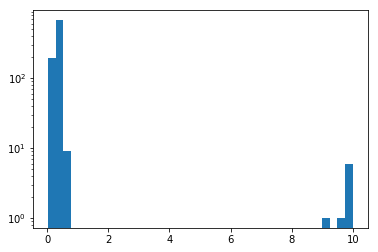

In [22]:
x = plt.hist(diff_clean, bins=40)
plt.yscale('log')

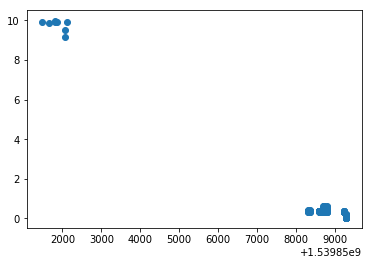

In [23]:
plt.scatter(timestamps, diff_clean)

In [24]:
from datetime import datetime

In [64]:
temp = []
for timestamp in timestamps:
    temp.append(datetime.utcfromtimestamp(timestamp))
new_timestamps = np.array(temp)
print(new_timestamps)

[datetime.datetime(2017, 9, 20, 13, 30, 3, 199855)
 datetime.datetime(2017, 9, 20, 13, 30, 3, 299066)
 datetime.datetime(2017, 9, 20, 13, 30, 3, 399562) ...
 datetime.datetime(2017, 9, 20, 14, 39, 42, 99622)
 datetime.datetime(2017, 9, 20, 14, 39, 42, 199223)
 datetime.datetime(2017, 9, 20, 14, 39, 42, 299685)]


(736592.5555555555, 736592.6180555555)

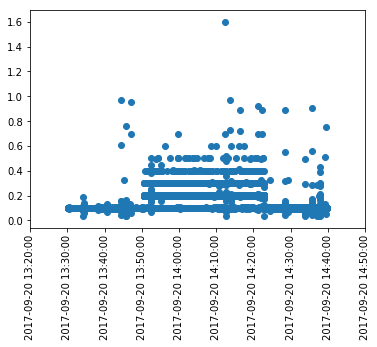

In [77]:
plt.scatter(new_timestamps, diff_clean)
import matplotlib.dates as md
plt.xticks(rotation=90)
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.xlim(datetime(2017, 9, 20, 13, 20), datetime(2017, 9, 20, 14, 50))